Best Parameters for k-NN:  {'n_neighbors': np.int64(19)}
Confusion Matrix (Decision Tree):
 [[36  0]
 [ 0 24]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        24

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy (Decision Tree): 1.0
F1 Score (Decision Tree): 1.0
Confusion Matrix (k-NN):
 [[22 14]
 [15  9]]
Classification Report (k-NN):
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.39      0.38      0.38        24

    accuracy                           0.52        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.51      0.52      0.51        60

Accuracy (k-NN): 0.5166666666666667
F1 Score (k-NN): 0.5148

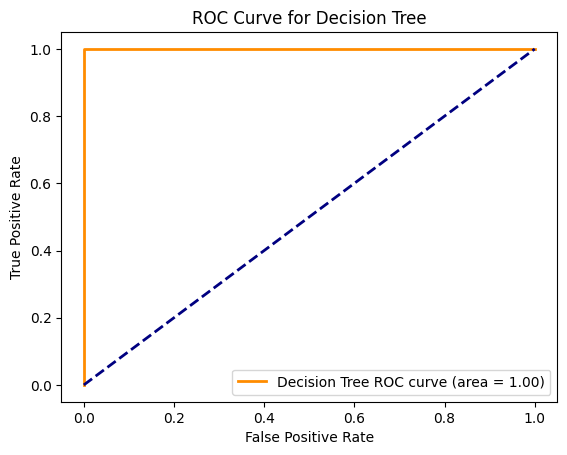

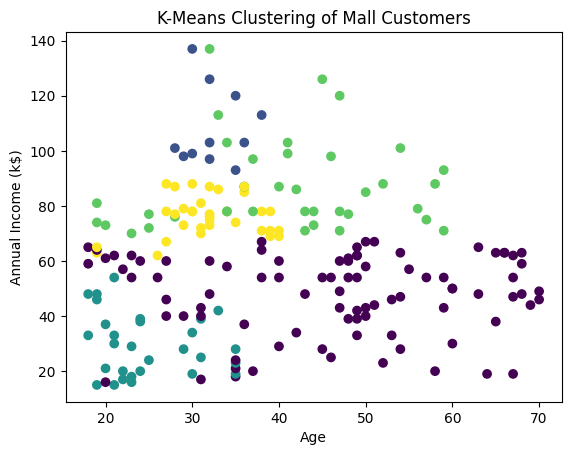

Association Rules:
       antecedents     consequents  antecedent support  consequent support  \
0     (Age_bin_2)  (Income_bin_3)               0.525               0.400   
1  (Income_bin_3)     (Age_bin_2)               0.400               0.525   

   support  confidence      lift  representativity  leverage  conviction  \
0    0.225    0.428571  1.071429               1.0     0.015    1.050000   
1    0.225    0.562500  1.071429               1.0     0.015    1.085714   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.140351  0.321429   0.047619    0.495536  
1       0.111111  0.321429   0.078947    0.495536  


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = 'C:/Users/DELL/Downloads/archive (1)/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Preprocessing the data
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Features and target for classification
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Gender']  # Classification target (gender)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ================================================
# 1. Classification: Decision Tree and k-NN
# ================================================

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# k-NN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# ================================================
# 2. Hyperparameter Tuning for k-NN (example)
# ================================================

param_grid_knn = {'n_neighbors': np.arange(1, 21)}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Best parameters for k-NN
print("Best Parameters for k-NN: ", grid_search_knn.best_params_)

# ================================================
# 3. Model Evaluation
# ================================================

# Decision Tree - Evaluation
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):\n", cm_dt)
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"Accuracy (Decision Tree): {accuracy_dt}")
print(f"F1 Score (Decision Tree): {f1_dt}")

# k-NN - Evaluation
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (k-NN):\n", cm_knn)
print("Classification Report (k-NN):\n", classification_report(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"Accuracy (k-NN): {accuracy_knn}")
print(f"F1 Score (k-NN): {f1_knn}")

# Plot ROC Curve (Decision Tree)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# ================================================
# 4. Clustering: K-Means
# ================================================

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
X['Cluster'] = kmeans.labels_

# Visualize clustering results
plt.scatter(X['Age'], X['Annual Income (k$)'], c=X['Cluster'], cmap='viridis')
plt.title("K-Means Clustering of Mall Customers")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# ================================================
# 5. Association Rule Mining: Apriori Algorithm
# ================================================

# Bin continuous variables into categories
data['Age_bin'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 100], labels=[1, 2, 3, 4])
data['Income_bin'] = pd.cut(data['Annual Income (k$)'], bins=[0, 30, 60, 90, 120, 200], labels=[1, 2, 3, 4, 5])
data['Spending_bin'] = pd.cut(data['Spending Score (1-100)'], bins=[0, 25, 50, 75, 100], labels=[1, 2, 3, 4])

# Create a binary matrix for these binned features
data_binary = pd.get_dummies(data[['Age_bin', 'Income_bin', 'Spending_bin']])

# Apply the Apriori algorithm
frequent_itemsets = apriori(data_binary, min_support=0.2, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Association Rules:\n", rules)

# ================================================
# Insights and Real-World Applications
# ================================================

# The Decision Tree model can be used to predict customer gender based on their demographic details.
# The k-NN model also shows how we can predict customer characteristics based on proximity to other customers.
# K-Means clustering helps group customers with similar behaviors (e.g., by age, income, and spending score).
# Association rules can reveal patterns like customers who have high spending scores might also have high annual incomes.
